## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plots
sns.set(style="whitegrid")
%matplotlib inline

## Step 1: Load the Data

Read your raw dataset from the data/raw folder:

In [ ]:
df = pd.read_csv('../data/raw/data.csv')

## Display the first few rows:

In [ ]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Check basic info:

In [ ]:
df.info()       # Columns, non-null counts, data types
df.shape       # Number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

(95662, 16)

## Step 2: Summary Statistics

For numerical features:

In [ ]:
df.describe().T  # Gives mean, std, min, max, quartiles

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


For categorical features:

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
TransactionId,95662,95662,TransactionId_76871,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


## Step 3: Distribution of Numerical Features

Plot histograms for each numeric column:

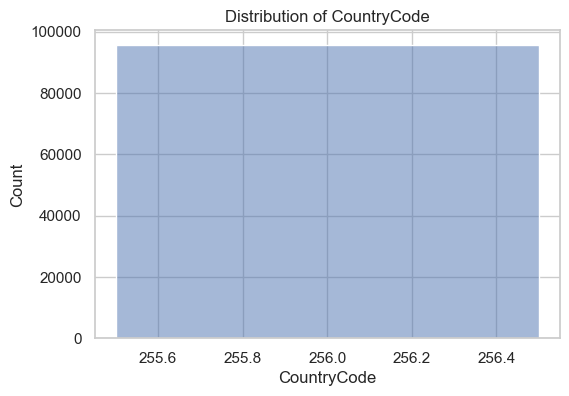

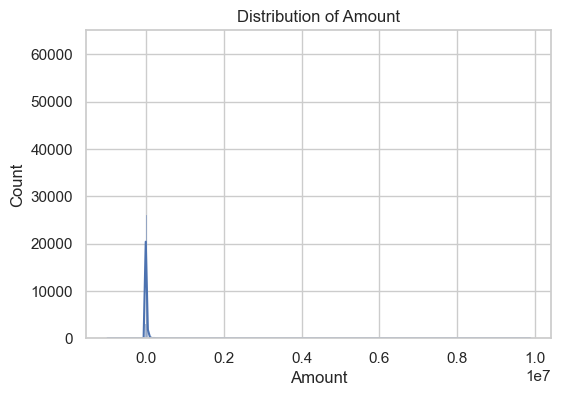

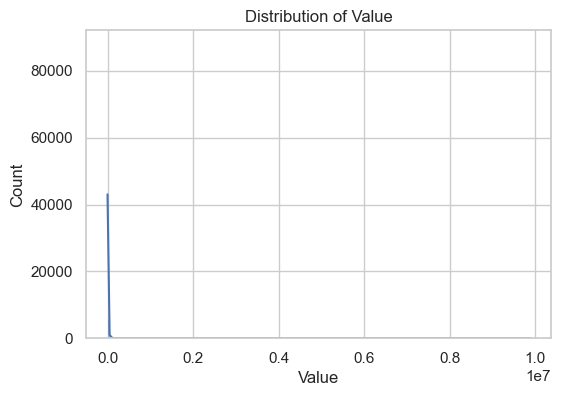

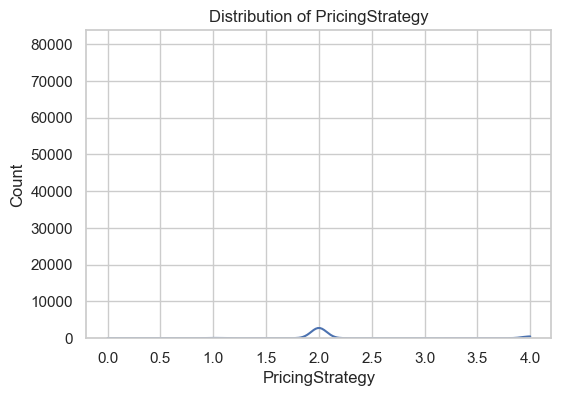

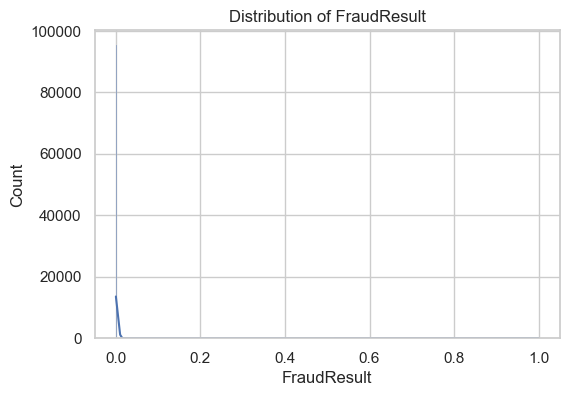

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Step 4: Distribution of Categorical Features

Count the frequency of each category:

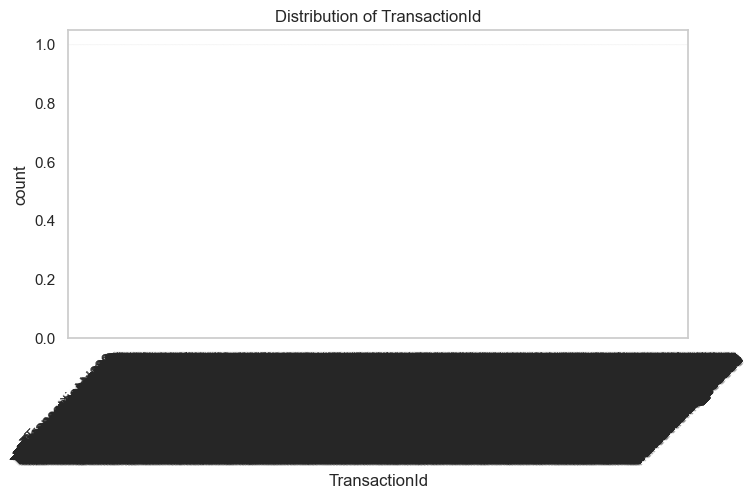

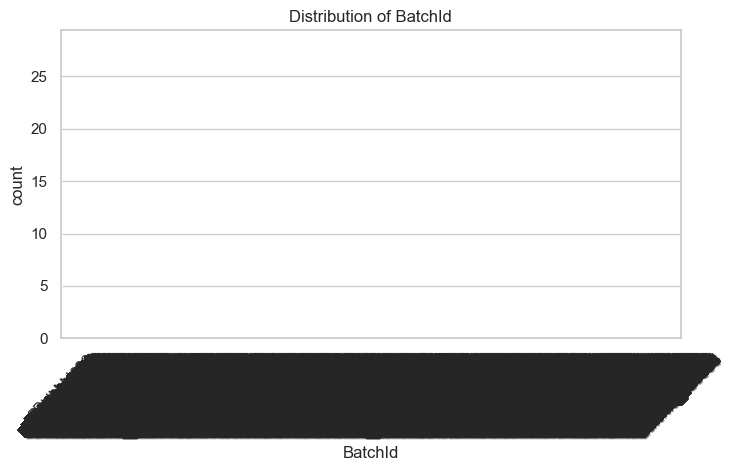

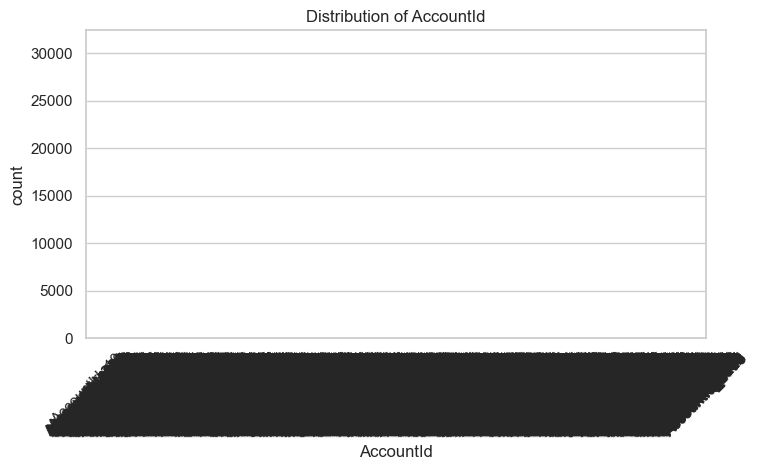

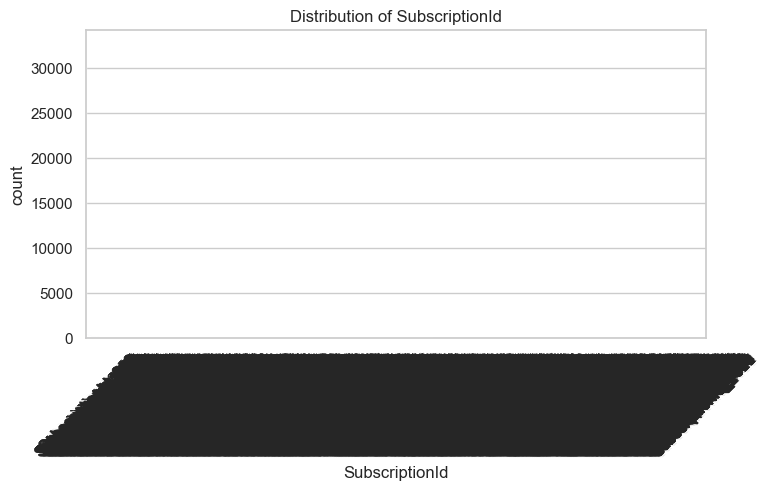

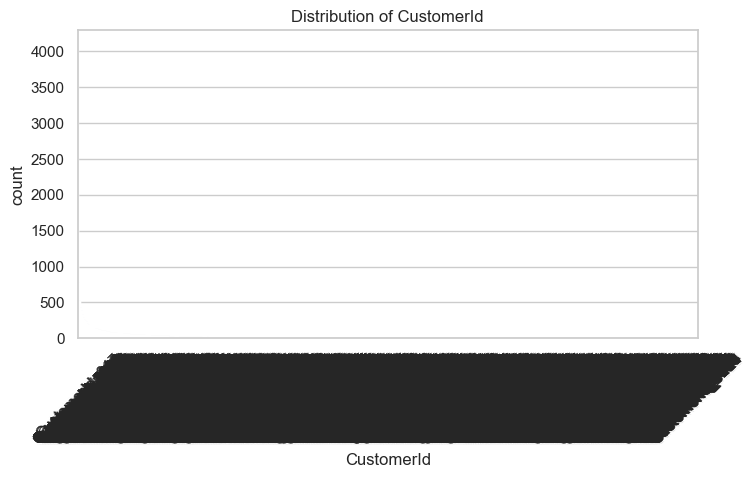

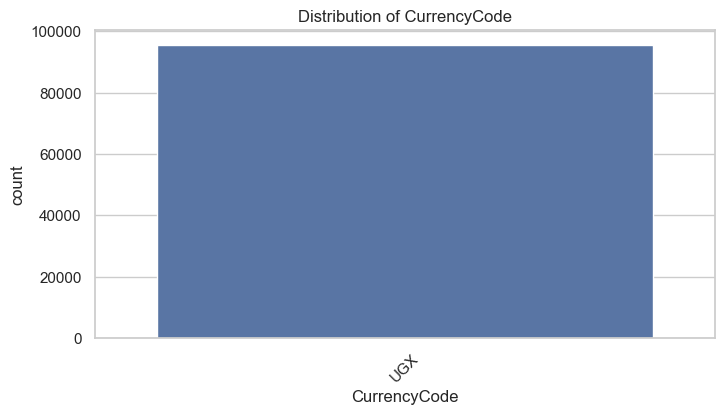

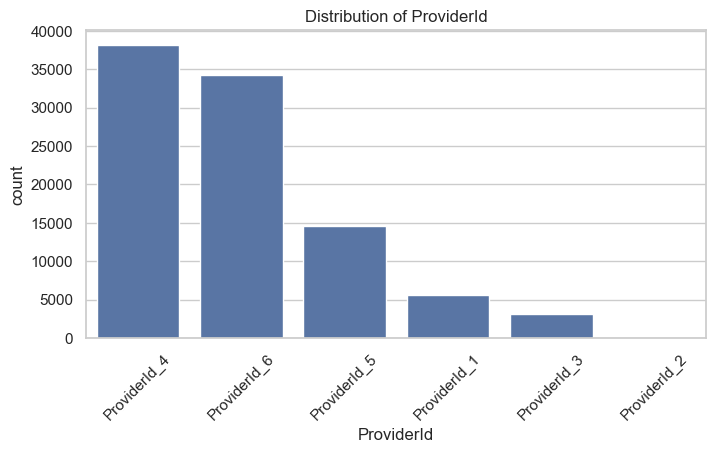

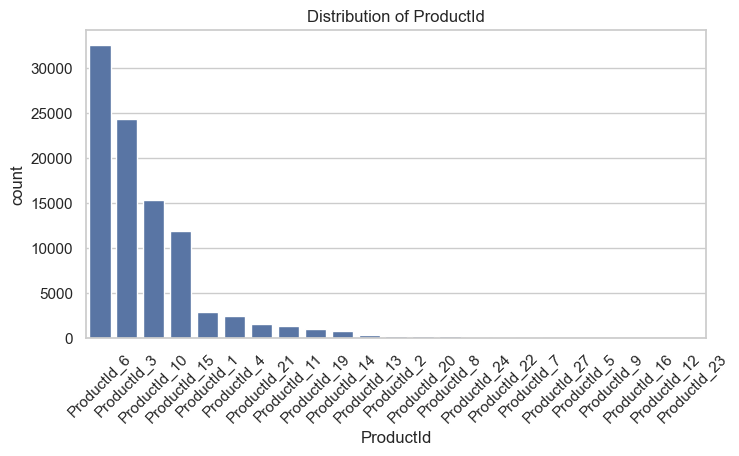

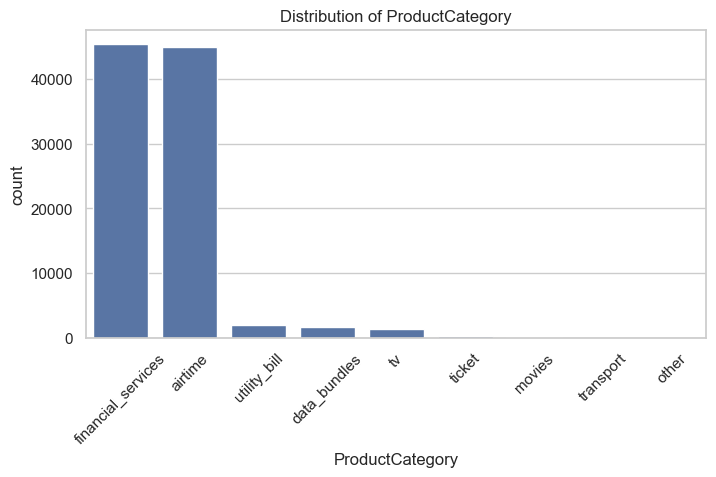

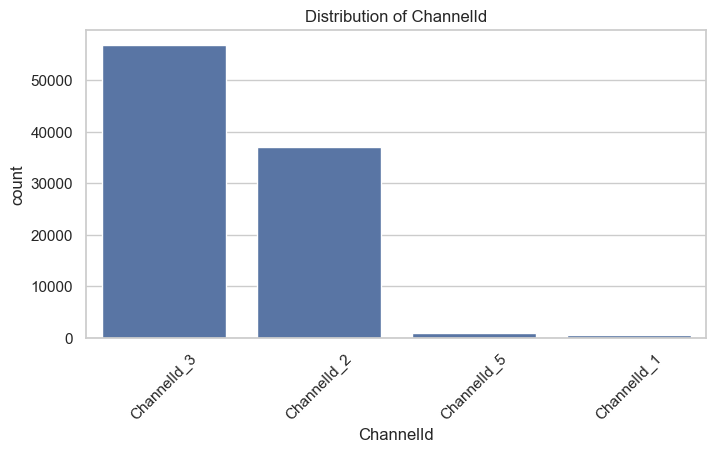

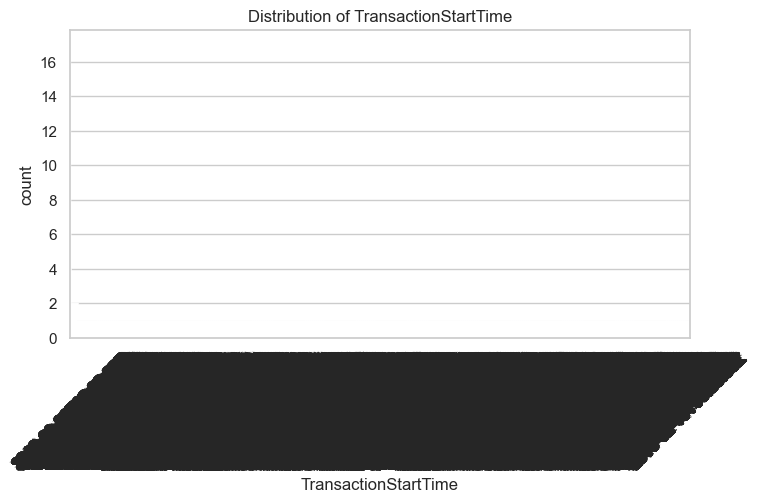

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Step 5: Correlation Analysis (Numerical Features)

Compute correlations:

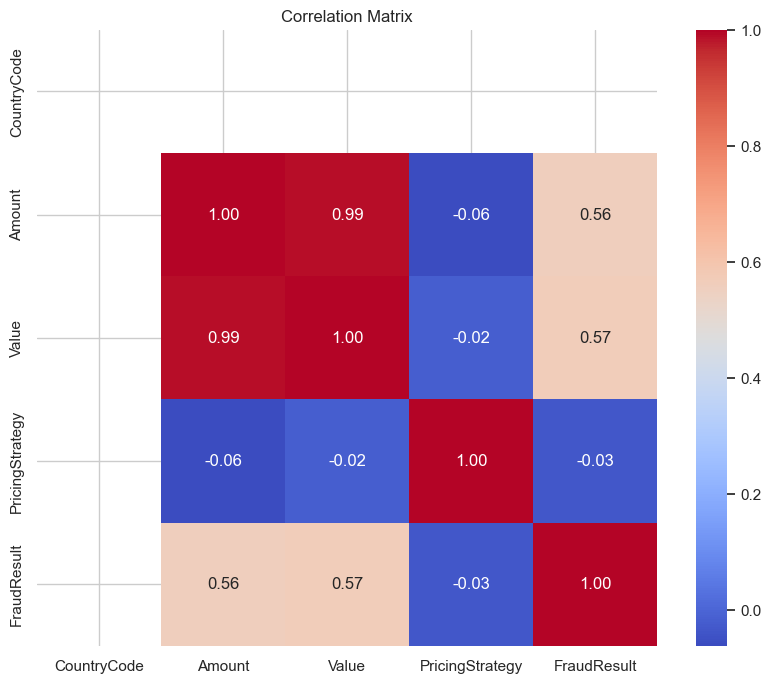

In [ ]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Step 6: Identify Missing Values

In [ ]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})

,Missing Count,Percent
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


## Step 7: Outlier Detection

Use boxplots for numerical columns:

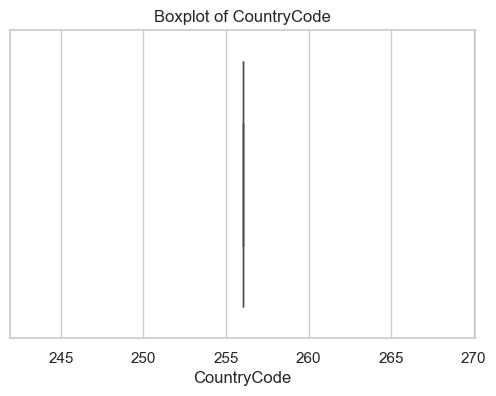

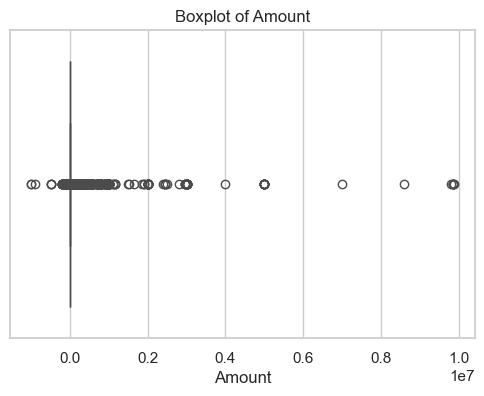

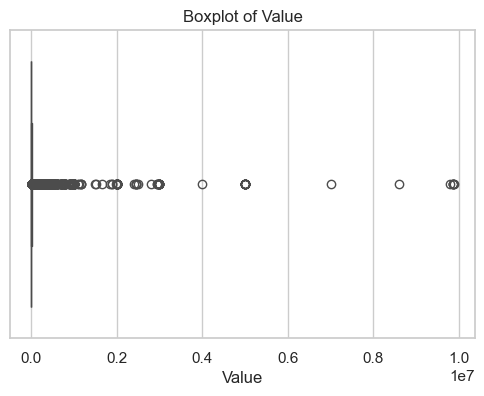

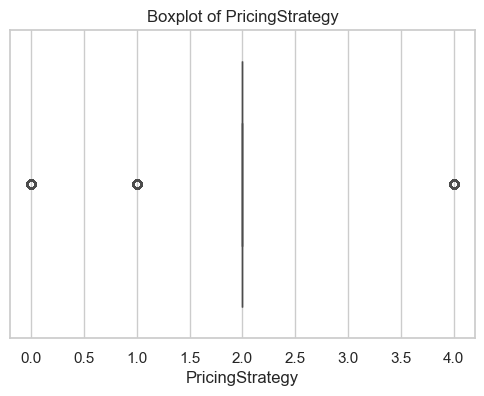

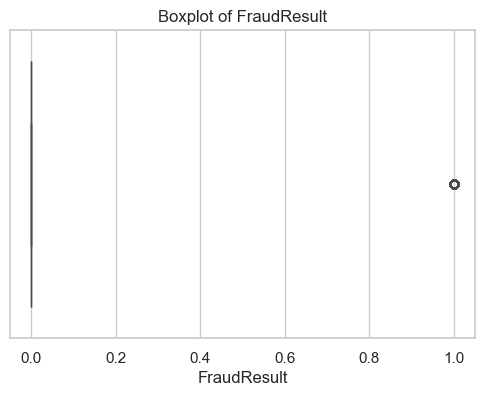

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
# Copy before cleaning
df_clean = df.copy()

# Basic cleaning (adjust if needed)
df_clean = df_clean.drop_duplicates()
df_clean['TransactionStartTime'] = pd.to_datetime(df_clean['TransactionStartTime'])

# Save cleaned data
output_path = r"C:\Users\Dell\Pictures\Credit-Risk-Probability-Model-using-Alternative-Data\data\processed\cleaned_transactions.csv"
df_clean.to_csv(output_path, index=False)


## Key EDA Insights and Business Implications

1. Transaction values are highly right-skewed, with a small number of extreme outliers.
   Business implication: Raw transaction amounts should not be used directly. Aggregation
   (mean, median) and log transformations are more stable for credit risk modeling.

2. A small subset of customers accounts for a large proportion of total transactions.
   Business implication: Frequency-based customer-level features are likely to be strong
   predictors of repayment behavior.

3. Amount and Value show very high correlation.
   Business implication: These variables are redundant; retaining both may add noise
   without improving predictive power.

4. Several categorical variables (ProductCategory, ChannelId) are highly imbalanced.
   Business implication: Rare categories should be grouped to avoid unstable model behavior.

5. Missing values exist in selected categorical features.
   Business implication: Missingness may itself carry risk information and should be
   handled deliberately rather than dropped blindly.


Note: All final cleaning and feature engineering logic will be implemented
in src/data_processing.py to ensure reproducibility and production readiness.
